In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [2]:
data=pd.read_csv("C:\/Users\Acer\Desktop\ML\Project-P355\Brent_Oil_Prices.csv",parse_dates=['Date'],index_col="Date")

C:\Users\Acer\AppData\Local\Temp\ipykernel_10636\2974154189.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv("C:\/Users\Acer\Desktop\ML\Project-P355\Brent_Oil_Prices.csv",parse_dates=['Date'],index_col="Date")


In [3]:
data

,Price
Date,
2010-01-04,79.05
2010-01-05,79.27
2010-01-06,80.14
2010-01-07,80.57
2010-01-08,80.06
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [4]:
data.describe()

,Price
count,3260.000000
mean,77.391098
std,26.554252
min,9.120000
25%,55.257500
50%,73.380000
75%,105.935000
max,133.180000


In [5]:
data.isnull().sum()

Price    0
dtype: int64

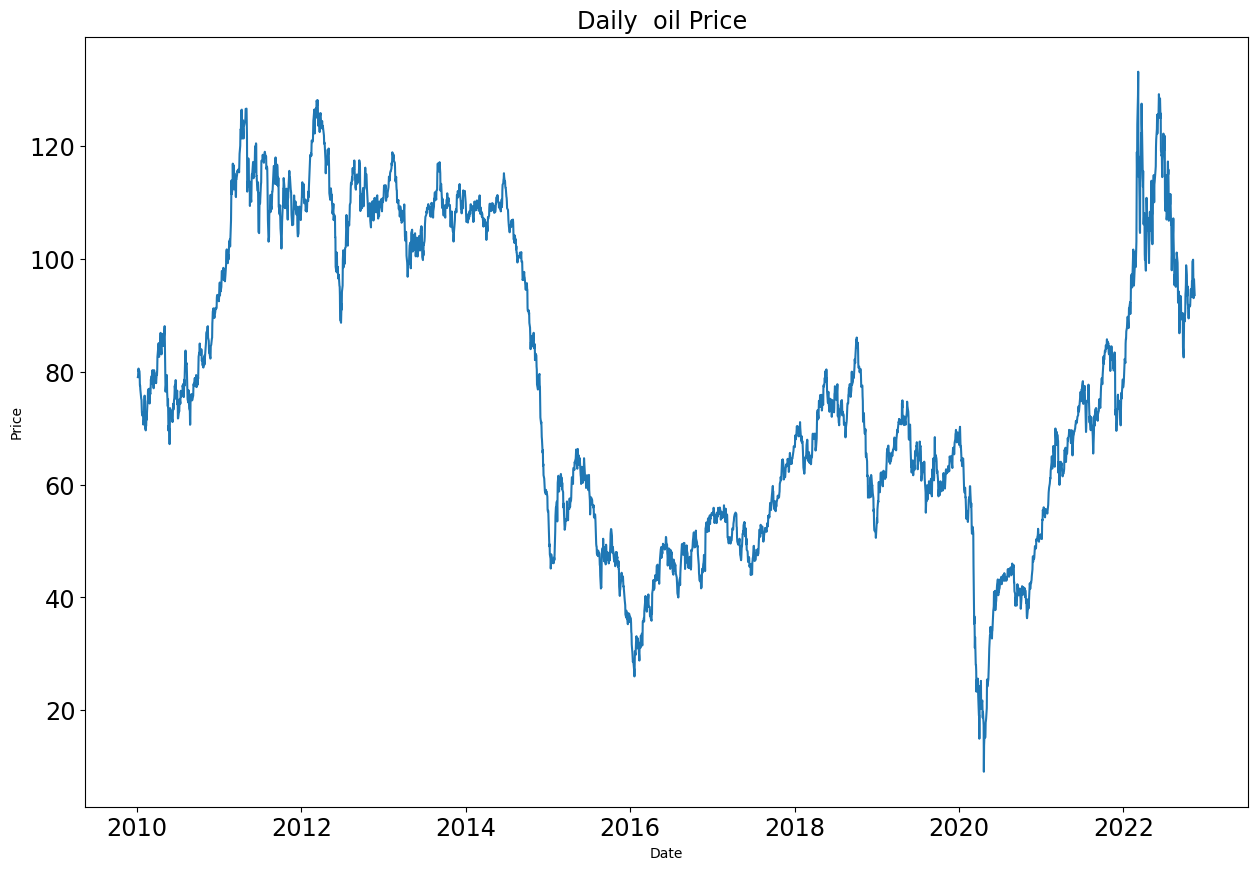

In [6]:
plt.plot(data.index, data["Price"])

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Daily  oil Price ")
plt.show()

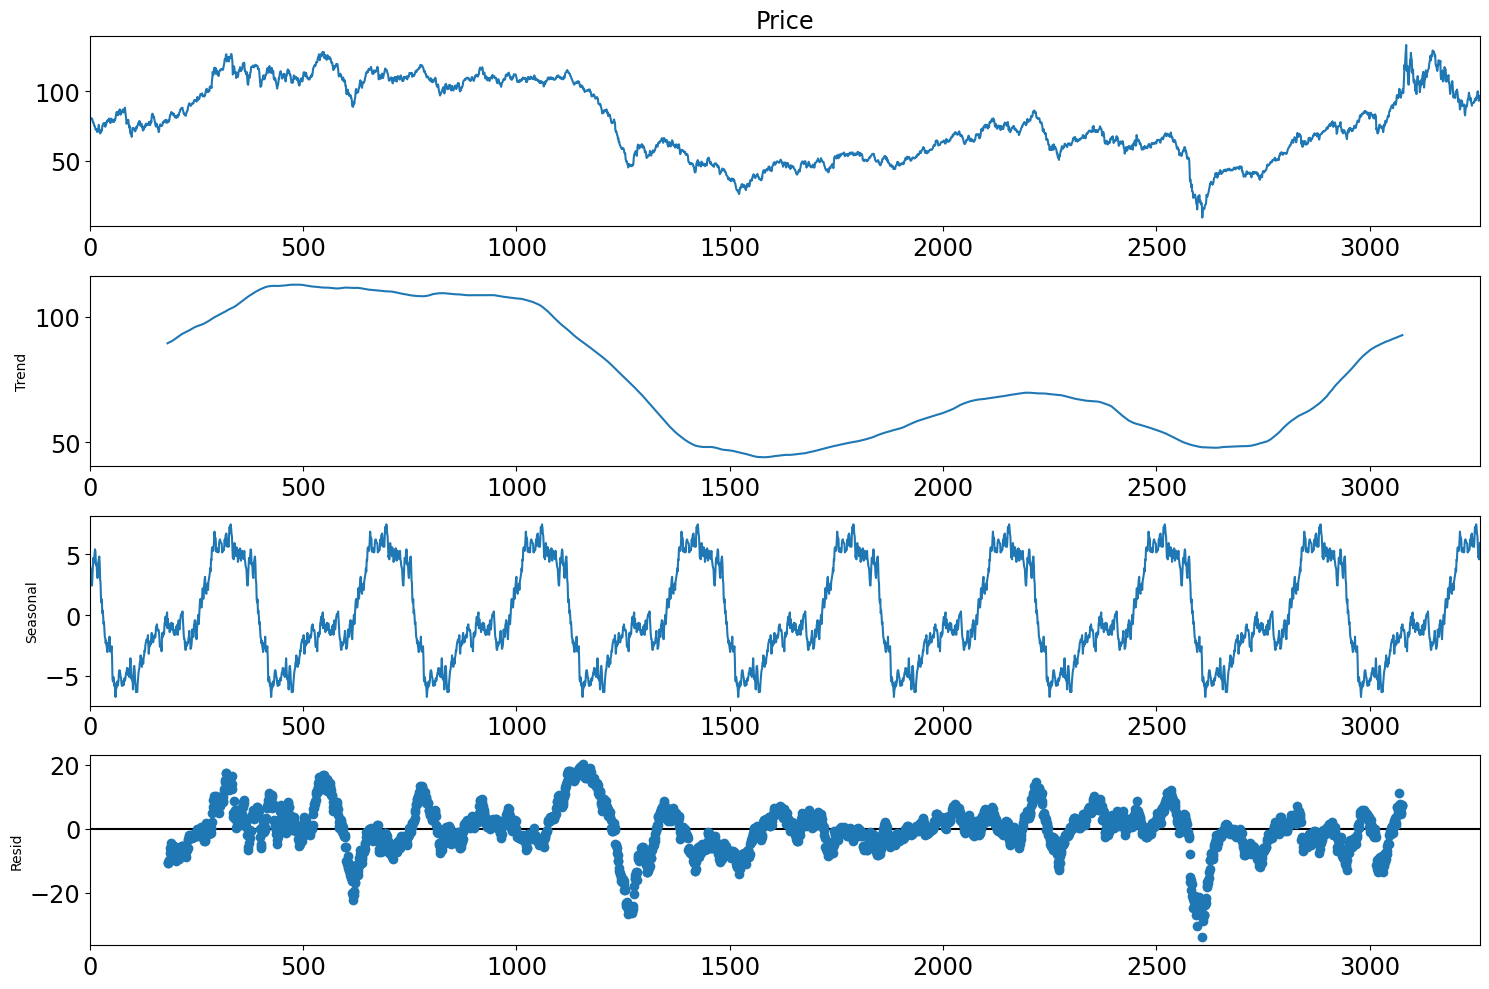

In [7]:
data.reset_index(inplace=True)


from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Price'], model='additive', period=365)
result.plot()
plt.show()

In [8]:
##   there are seasonal fluctuations within the data
##there are substantial variations in the data that are not explained by the trend and seasonal components.
 ## in this case we saw that on average, the oil prices are growing over time.

##Seasonality – variations at specific time-frames.

In [9]:
data["Date"].dt.year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3255    2022
3256    2022
3257    2022
3258    2022
3259    2022
Name: Date, Length: 3260, dtype: int32

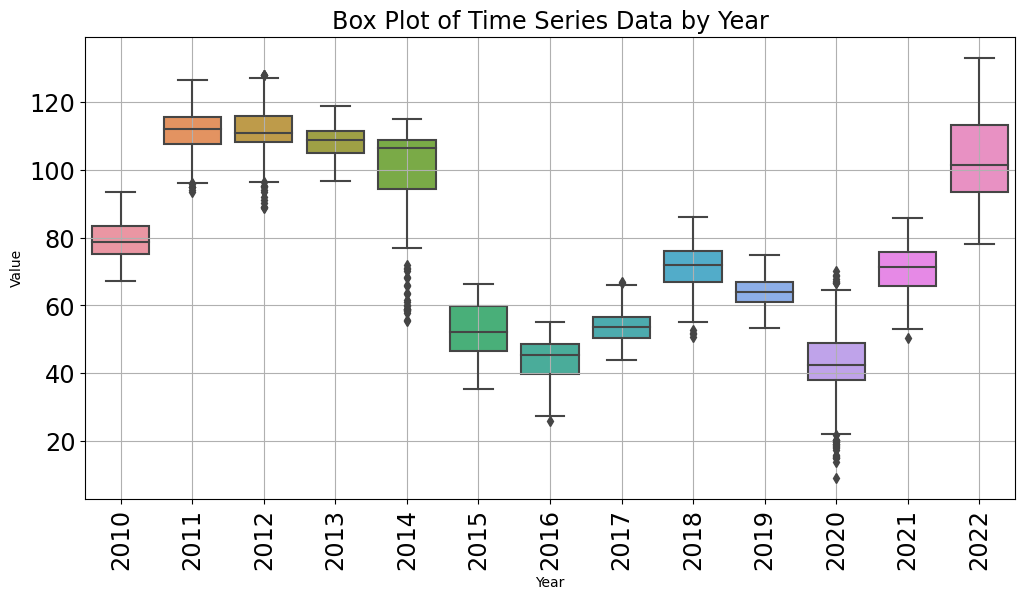

In [10]:


# Create a separate boxplot for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["Date"].dt.year, y='Price', data=data)
plt.title('Box Plot of Time Series Data by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [11]:
data.set_index("Date", inplace=True)
data

,Price
Date,
2010-01-04,79.05
2010-01-05,79.27
2010-01-06,80.14
2010-01-07,80.57
2010-01-08,80.06
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


Text(0.5, 1.0, ' Yearly Avg oil Price ')

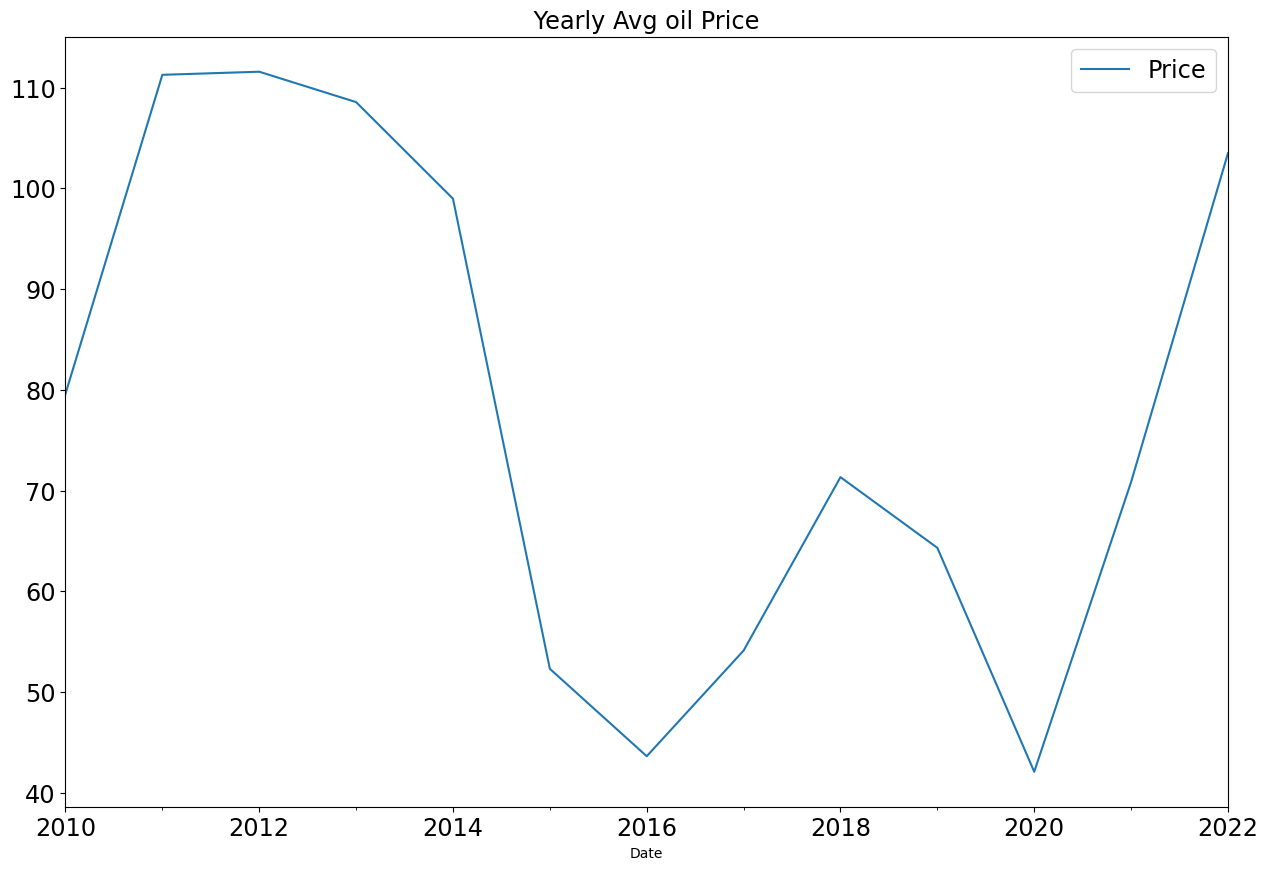

In [12]:
data_yearly_avg=data.resample('A').mean()

data_yearly_avg.plot()
plt.title(" Yearly Avg oil Price ")

In [13]:
## in 2014 to 2016  decrease in price

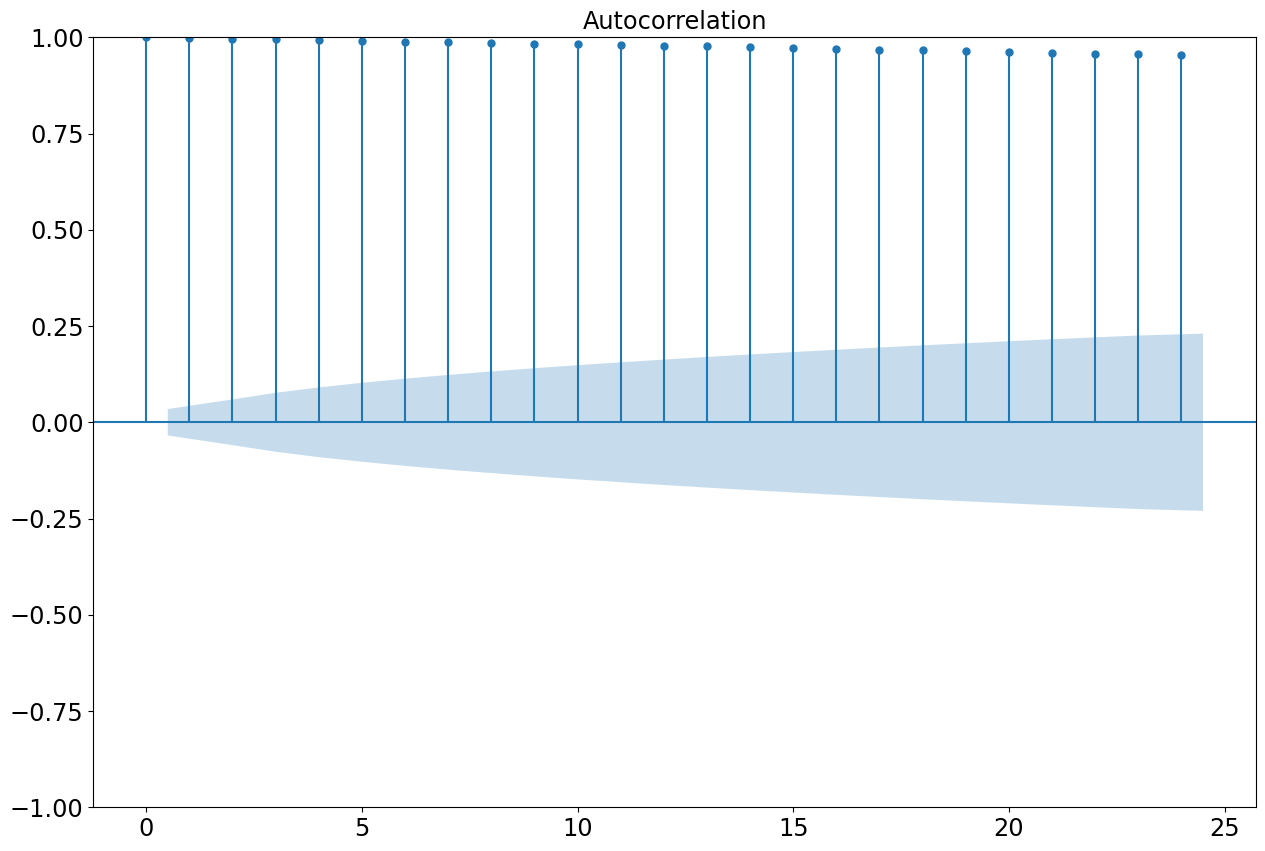

In [14]:


from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Price'],lags=24)

plt.show()


In [15]:
#future values of the series are correlated or heavily influenced by past values.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


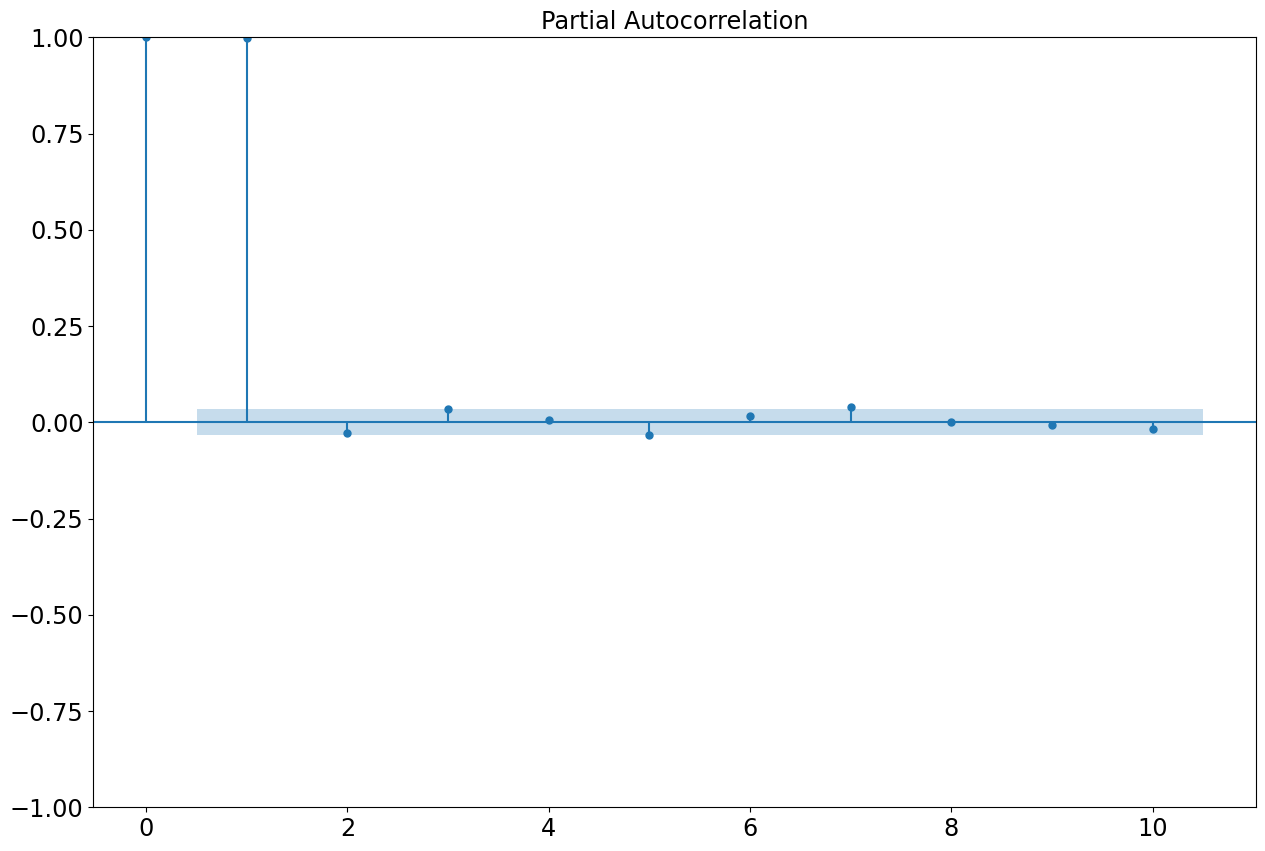

In [16]:
 from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Price"],lags=10)
plt.show()

In [17]:
##These can be used to determine the ‘p’ and ‘q’ values 

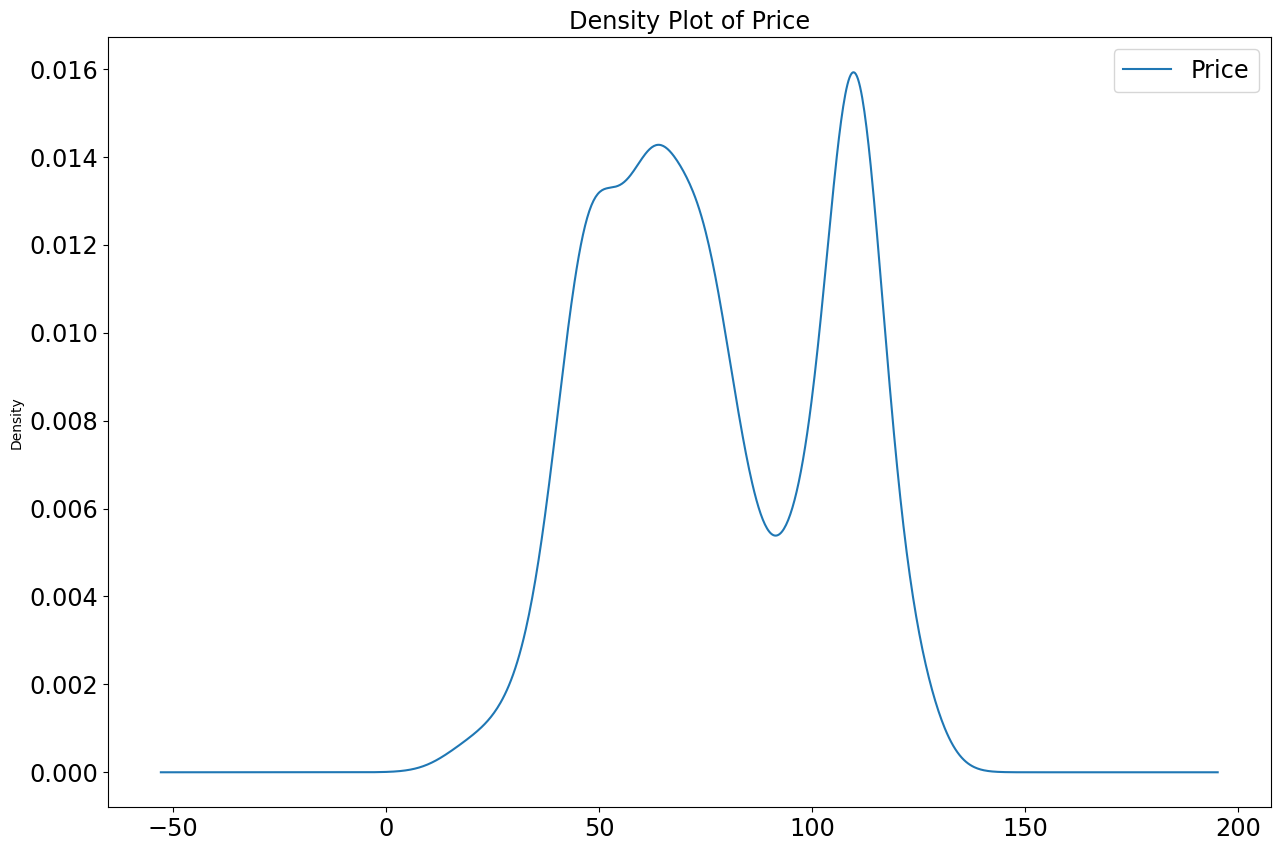

In [18]:
data.plot.kde()
plt.title('Density Plot of Price')
plt.show()


Text(0, 0.5, 'Data at time t+1')

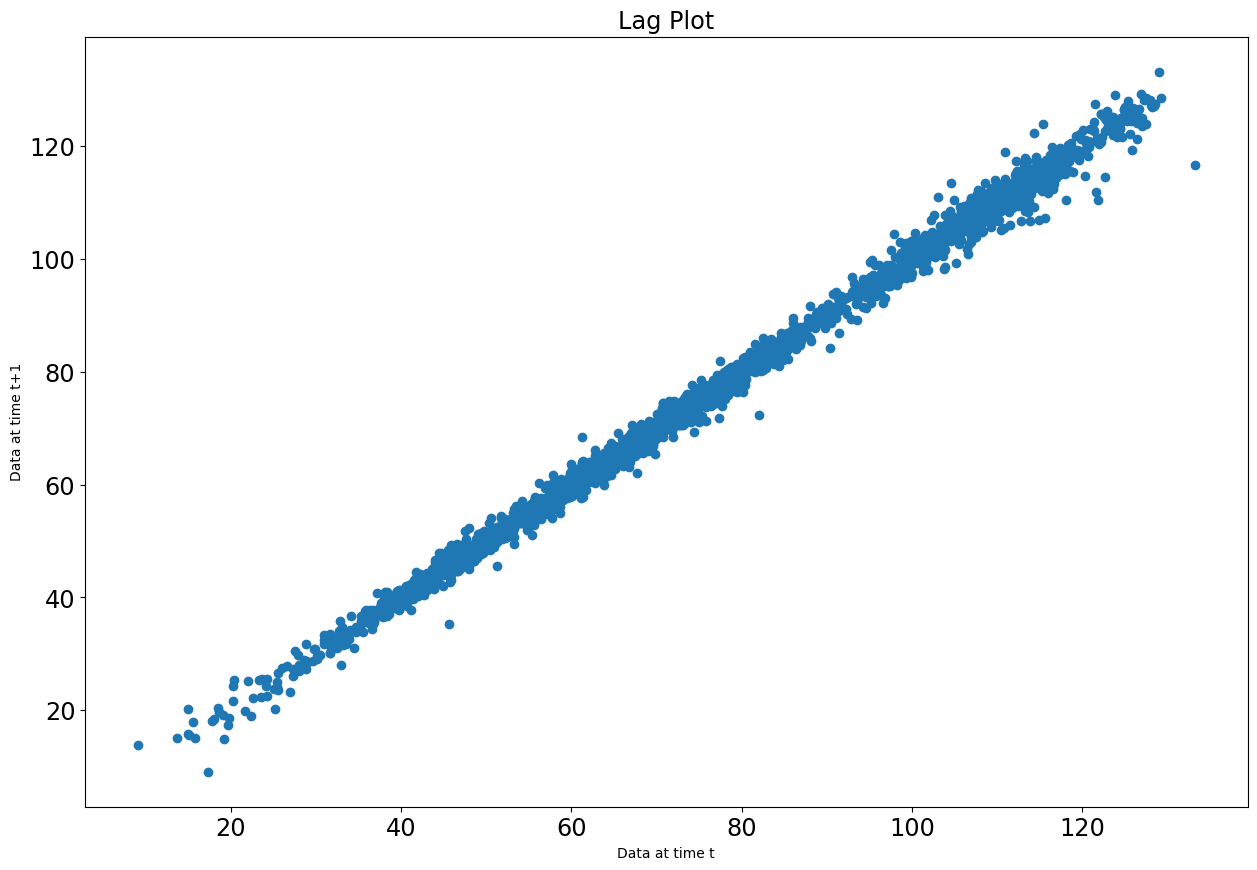

In [19]:
from pandas.plotting import lag_plot

lag_plot(data)

# Add title and labels
plt.title('Lag Plot')
plt.xlabel('Data at time t')
plt.ylabel('Data at time t+1')

In [20]:
# it indicates the presence of autocorrelation or some other systematic   relationship between the data points 

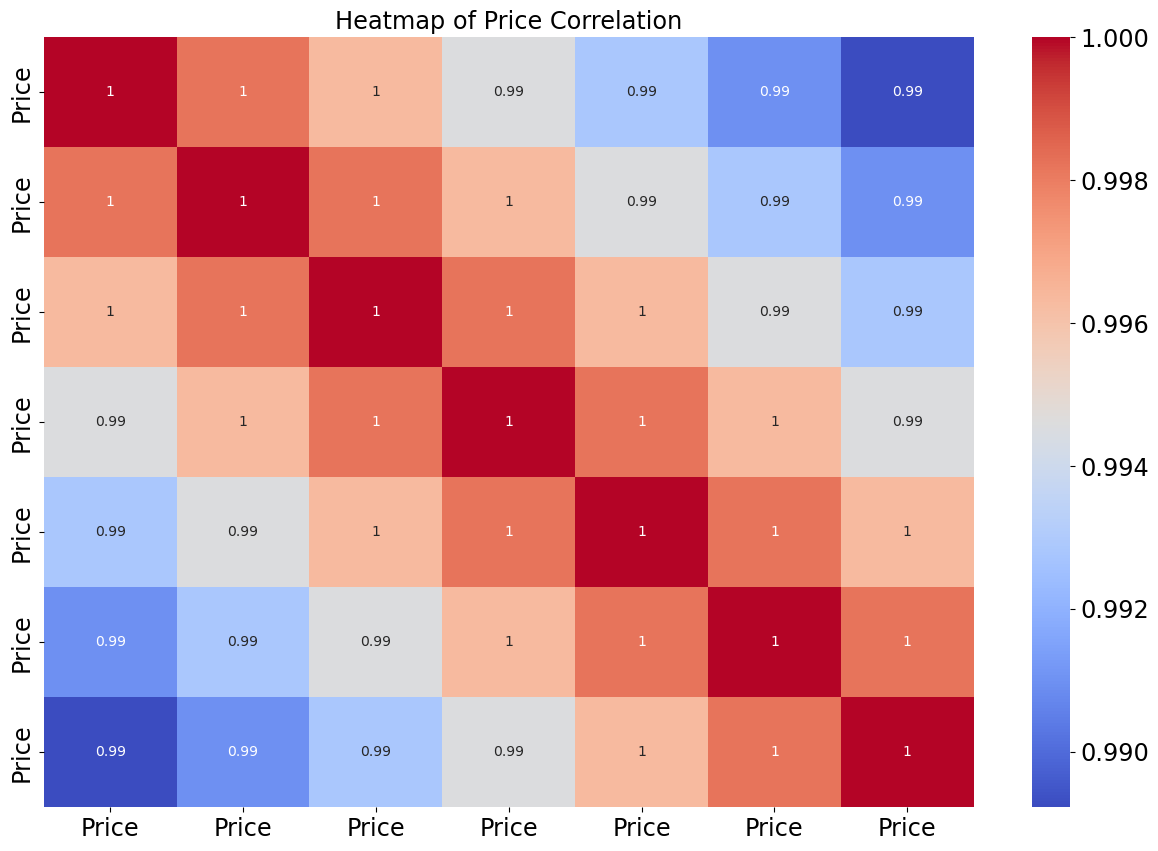

In [21]:

lags = 7
data1 = pd.DataFrame([data['Price'].shift(i) for i in range(lags)]).T.corr()
sns.heatmap(data1, annot=True, cmap='coolwarm')
plt.title('Heatmap of Price Correlation')
plt.show()

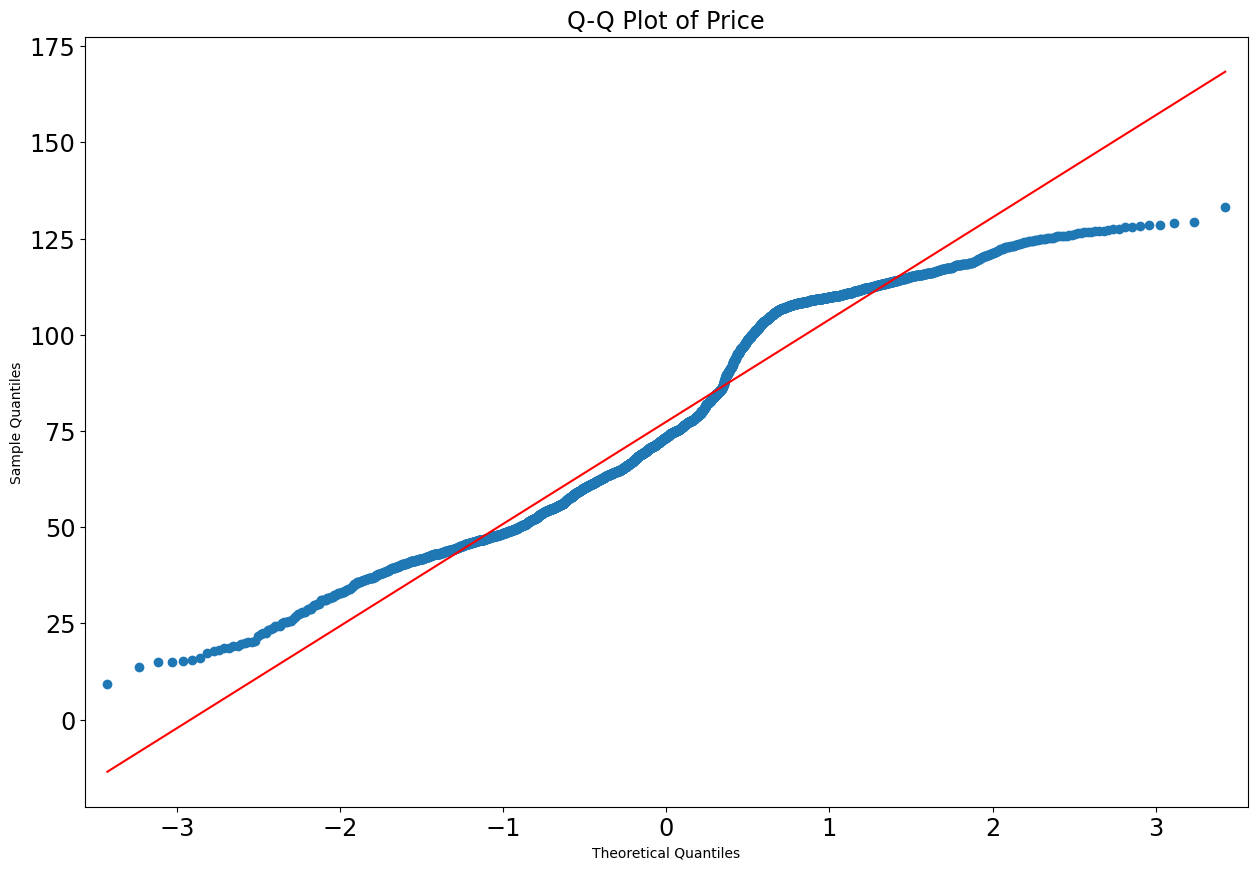

In [22]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['Price'], line='s')
plt.title('Q-Q Plot of Price')
plt.show()


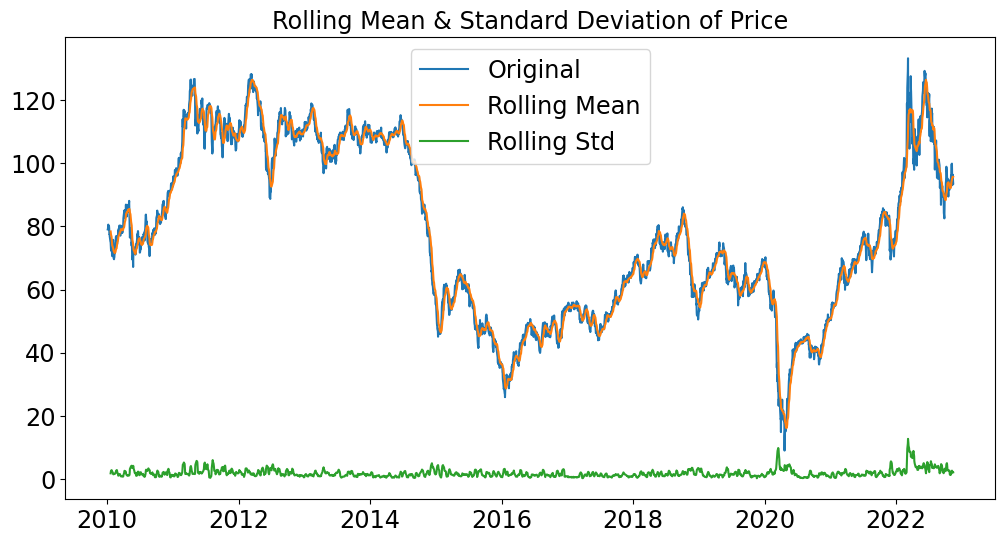

In [23]:
rolling_mean = data['Price'].rolling(window=12).mean()
rolling_std = data['Price'].rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(data['Price'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of Price')
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.827168
p-value: 0.367059
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [25]:
 ## P value >0.05 the data has a unit root and is non-stationary.

In [26]:
# because of the non-stationary data  will chose ARIMA model

from statsmodels.tsa.arima.model import ARIMA
import warnings  
warnings.filterwarnings('ignore')

In [27]:
# fit the ARIMA model
model = ARIMA(data, order=(0, 1, 0))
fitted_model = model.fit()

In [28]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 3260
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6149.613
Date:                Thu, 29 Feb 2024   AIC                          12301.227
Time:                        21:34:05   BIC                          12307.316
Sample:                             0   HQIC                         12303.408
                               - 3260                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.5499      0.028     91.784      0.000       2.495       2.604
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):              9783.22
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

# 'itertools.product' function to generate all possible combinations of (p, d, q) values for an ARIMA model,
# where each parameter ranges from 0 to 4

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [30]:
for param in pdq:
    try:
        model_arima = ARIMA(data.dropna(),order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
        
        
# performing a grid search over all combinations of (p, d, q) 
# parameters for ARIMA models and printing the AIC for each fitted model
# AIC is used to compare different possible models and determine which one is the best fit for the data

(0, 0, 0) 30634.797174414933
(0, 0, 1) 26370.528505930753
(0, 0, 2) 23029.663367561843
(0, 0, 3) 20646.055470616935
(0, 0, 4) 18993.69186851407
(0, 1, 0) 12301.226790368146
(0, 1, 1) 12302.234716398623
(0, 1, 2) 12301.987329080977
(0, 1, 3) 12303.782150108022
(0, 1, 4) 12304.482059747786
(0, 2, 0) 14499.438757102525
(0, 2, 1) 12308.52481282261
(0, 2, 2) 12309.511911532956
(0, 2, 3) 12309.296663752262
(0, 2, 4) 12311.10578159571
(0, 3, 0) 18022.28968193581
(0, 3, 1) 14506.123535474999
(0, 3, 2) 12330.036780190441
(0, 3, 3) 12338.306144281301
(0, 3, 4) 12331.751121504045
(0, 4, 0) 21904.409752707368
(0, 4, 1) 18027.865954246765
(0, 4, 2) 14520.537624917444
(0, 4, 3) 12486.086946849558
(0, 4, 4) 12540.802279296968
(1, 0, 0) 12310.89177605719
(1, 0, 1) 12311.78895533046
(1, 0, 2) 12311.699916388417
(1, 0, 3) 12313.538062500564
(1, 0, 4) 12314.110115488847
(1, 1, 0) 12302.28841653326
(1, 1, 1) 12303.421692129294
(1, 1, 2) 12303.903699120674
(1, 1, 3) 12305.249825805218
(1, 1, 4) 12306.26184

In [51]:
train_ar = data.head(2609)
test_ar = data.tail(651)
train_ar

,Price
Date,
2010-01-04,79.05
2010-01-05,79.27
2010-01-06,80.14
2010-01-07,80.57
2010-01-08,80.06
...,...
2020-04-15,19.80
2020-04-16,18.69
2020-04-17,19.75


In [52]:
test_ar

,Price
Date,
2020-04-22,13.77
2020-04-23,15.06
2020-04-24,15.87
2020-04-27,15.17
2020-04-28,15.60
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [66]:
#ARIMA

from sklearn.metrics import mean_absolute_percentage_error

In [67]:
ARIMA_model = ARIMA(train_ar, order=(0, 1, 0))
ARIMA_model_fit = ARIMA_model.fit()

# Adjusted the start and end indices based on test data
ARIMA_pred = ARIMA_model_fit.predict(start=2610, end=3260, typ='levels')


# Calculated MAPE between the actual test data and the predictions
mape = mean_absolute_percentage_error(test_ar, ARIMA_pred) * 100
print("MAPE:", mape)

#13.015 is a pritty good forcasting

MAPE: 85.37984342239479


In [70]:
#SARIMA
#Trainset

import statsmodels.api as sm

# Define and fit the SARIMA model using the training data
SARIMA_model1 = sm.tsa.statespace.SARIMAX(train_ar, order=(0, 1, 0), seasonal_order=(0, 1, 0, 5))
SARIMA_model_fit1 = SARIMA_model1.fit()

# predictions for the same range as the training data
# adjusted the end to match the last of the training data
SARIMA_pred1 = SARIMA_model_fit1.predict(start=1, end=len(train_ar), typ='levels')

# mean absolute percentage error between the actual training data and the predictions
mape = mean_absolute_percentage_error(train_ar, SARIMA_pred1) * 100
print("MAPE:", mape)

MAPE: 1.5025220867704534


In [73]:
#Testset

# fit the SARIMA model using the training data
SARIMA_model = sm.tsa.statespace.SARIMAX(train_ar, order=(0, 1, 0), seasonal_order=(0, 1, 0, 5))
SARIMA_model_fit = SARIMA_model.fit()

# predictions for the test period
# adjusted the start and end based on the size of test data
SARIMA_pred = SARIMA_model_fit.predict(start=len(train_ar), end=len(train_ar) + len(test_ar) - 1, typ='levels')

# mean absolute percentage error between the actual test data and the predictions
mape = mean_absolute_percentage_error(test_ar, SARIMA_pred) * 100
print("MAPE:", mape)


MAPE: 1095.4311453858857


In [57]:
import tensorflow.compat.v1 as tf

In [58]:
def spot_price(data,window_size=5):
    data_=data.to_numpy()
    x=[]
    y=[]
    
    for i in range(len(data)-window_size): #last 5 rows are neglected since the window size is 5
        row=[price for price in data_[i:i+window_size]]
        x.append(row)
    #print(x)   
        label=data_[i+window_size]
        y.append(label)
        
    return np.array(x),np.array(y)

# the function returns the input features x and corresponding labels y as NumPy arrays.

In [59]:
x,y=spot_price(data)
x.shape,y.shape

#The shape of x (number_of_samples, window_size, num_features) and the shape of y (number_of_samples,number_features).

((3255, 5, 1), (3255, 1))

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

# splitting data for training and testing

In [61]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2604, 5, 1), (2604, 1), (651, 5, 1), (651, 1))

In [74]:
import tensorflow.compat.v1 as tf
from tensorflow.keras.layers import LSTM,Dense,Flatten

# we can build a sequential model using these liberaries to define the architecture of your neural 
# network for tasks like sequence prediction or time series forecasting.

In [75]:
model=Sequential()
#model.add(InputLayer(Input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

# taking input sequences of length 5 with one feature dimension

In [76]:
model.compile(loss='mean_absolute_percentage_error',optimizer='adam')

# compile the model using mean absolute percentage error as the loss function and the adam optimizer
# Adam optimizer: "Adaptive Moment Estimation" minimize the loss function during the training of neural networks.

In [77]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=20,batch_size=10,verbose=1)

# This code will train the model for 20 epochs using the specified loss function and optimizer

Epoch 1/20
261/261 [==============================] - 20s 28ms/step - loss: 54.5264 - val_loss: 32.1395
Epoch 2/20
261/261 [==============================] - 5s 20ms/step - loss: 27.4919 - val_loss: 17.8167
Epoch 3/20
261/261 [==============================] - 5s 21ms/step - loss: 7.6939 - val_loss: 3.7976
Epoch 4/20
261/261 [==============================] - 5s 20ms/step - loss: 4.4376 - val_loss: 3.8627
Epoch 5/20
261/261 [==============================] - 5s 18ms/step - loss: 3.7696 - val_loss: 4.5825
Epoch 6/20
261/261 [==============================] - 5s 21ms/step - loss: 3.4305 - val_loss: 3.3135
Epoch 7/20
261/261 [==============================] - 5s 20ms/step - loss: 3.0929 - val_loss: 2.7207
Epoch 8/20
261/261 [==============================] - 5s 20ms/step - loss: 3.0713 - val_loss: 2.2169
Epoch 9/20
261/261 [==============================] - 5s 17ms/step - loss: 2.7076 - val_loss: 3.7991
Epoch 10/20
261/261 [==============================] - 5s 20ms/step - loss: 2.6673 - v

In [78]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_pred_test

# y_pred_test will contain the predicted values for the testing data, 
# which can be compared with the actual values (y_test) to evaluate the model's performance

21/21 [==============================] - 0s 9ms/step


array([[ 70.324234],
       [ 76.93532 ],
       [ 61.03803 ],
       [ 48.681995],
       [110.79747 ],
       [ 95.59892 ],
       [ 84.50531 ],
       [ 48.13254 ],
       [ 21.469032],
       [ 43.345318],
       [107.723175],
       [106.98671 ],
       [ 41.800594],
       [107.54826 ],
       [ 54.573246],
       [109.13809 ],
       [104.97288 ],
       [ 76.62715 ],
       [ 75.247696],
       [110.31455 ],
       [114.06753 ],
       [121.396164],
       [ 77.93085 ],
       [ 98.03288 ],
       [ 61.04648 ],
       [103.369896],
       [ 62.588116],
       [123.01021 ],
       [ 63.552273],
       [ 69.359375],
       [110.47859 ],
       [ 57.670506],
       [108.472046],
       [116.63318 ],
       [ 75.70112 ],
       [ 46.803875],
       [ 35.44015 ],
       [ 91.90243 ],
       [ 48.0882  ],
       [107.88097 ],
       [102.44496 ],
       [ 47.686123],
       [ 59.71765 ],
       [108.90508 ],
       [ 74.43233 ],
       [ 44.7978  ],
       [106.3513  ],
       [ 70.2

In [79]:
test_data_result=pd.DataFrame(data={'actual_price_test':y_test.flatten(),'predicted_price_test':y_pred_test.flatten()})

In [80]:
lstm_MAPE=mean_absolute_percentage_error(test_data_result['actual_price_test'],test_data_result['predicted_price_test'])*100 
lstm_MAPE

# lstm_MAPE will contain the MAPE value, representing the average percentage difference between the actual prices 
# and the predicted prices on the testing data

# MAPE score below 10 is the good forcasting

1.7805952863473435